In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
ticker_symbol = "TATAMOTORS.NS" 
stock_data_month = yf.download(ticker_symbol, period='5y', interval='1mo')
stock_data_month['return']=np.log(stock_data_month["Close"]/stock_data_month["Close"].shift(1)) # Gives log(price[t]/price[t-1])
stock_data_month= stock_data_month.dropna()
stock_data_month.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2019-11-01,175.199997,178.899994,159.899994,161.500000,160.502914,554109570,-0.095592
2019-12-01,160.949997,187.899994,157.399994,185.149994,184.006912,812751608,0.136661
2020-01-01,185.149994,201.699997,174.899994,176.600006,175.509705,886712613,-0.047279
2020-02-01,175.399994,184.949997,127.050003,128.949997,128.153870,1055369812,-0.314463
2020-03-01,133.000000,133.899994,63.500000,71.050003,70.611343,1625401538,-0.596041


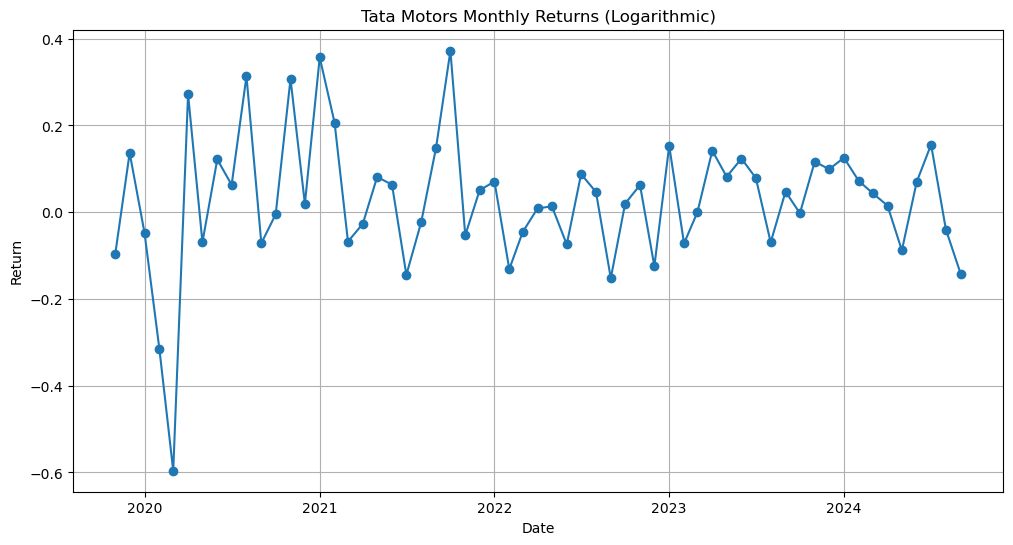

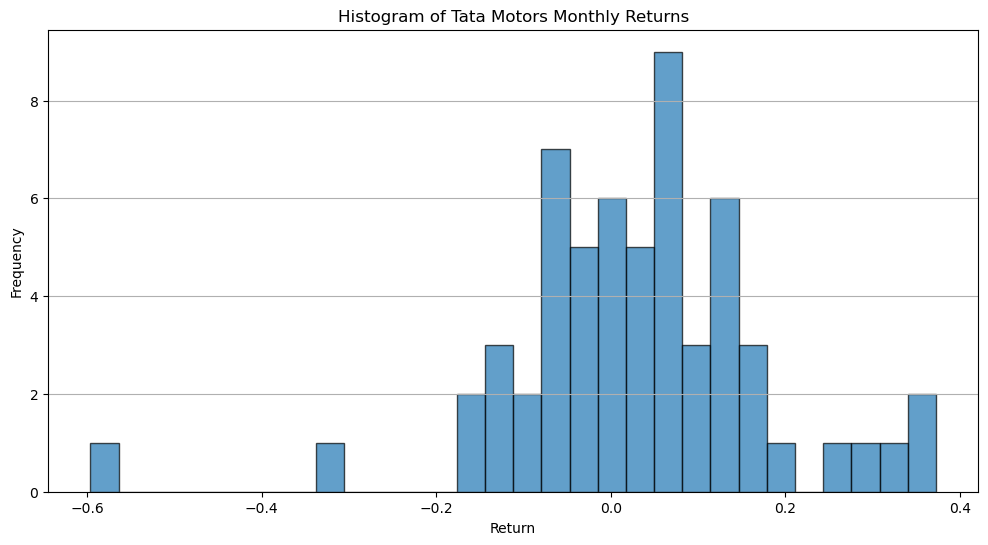

In [3]:
# Plotting the line graph for returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data_month.index, stock_data_month['return'], marker='o', linestyle='-')

# Customizing the plot
plt.title("Tata Motors Monthly Returns (Logarithmic)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)

# Plotting the histogram for returns
plt.figure(figsize=(12, 6))
plt.hist(stock_data_month['return'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Tata Motors Monthly Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(axis='y')

# Show the plot
plt.show()

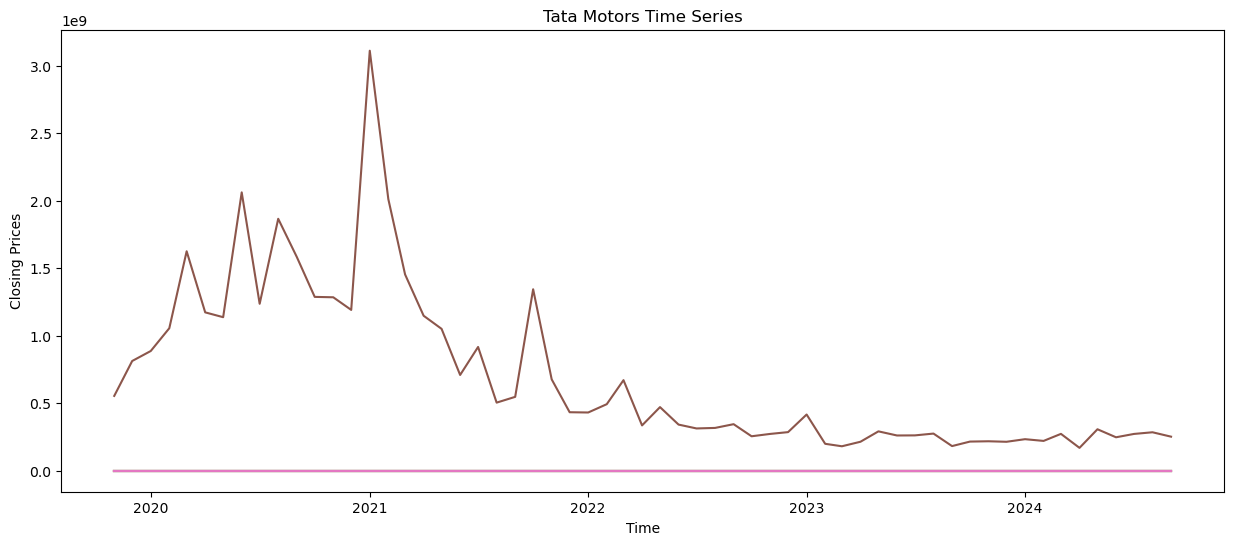

In [4]:
#Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.figure(figsize=(15,6))
plt.xlabel("Time")
plt.ylabel("Closing Prices")
plt.title("Tata Motors Time Series")
plt.plot(stock_data_month)
plt.show()

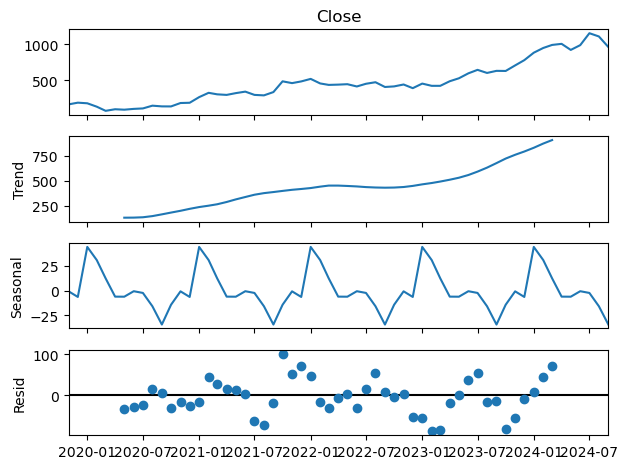

In [5]:
seasonal_decompose(stock_data_month['Close'], model='additive').plot()
plt.show()


In [6]:
# Dickey Fuller
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(stock_data_month['return'])

# Print ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


ADF Statistic: -7.154545883921427
p-value: 3.078932933337803e-10
Critical Value (1%): -3.548
Critical Value (5%): -2.913
Critical Value (10%): -2.594


C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  15.127
Date:                Thu, 26 Sep 2024   AIC                            -24.254
Time:                        01:10:21   BIC                            -18.768
Sample:                    11-01-2019   HQIC                           -22.199
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0487      0.126      0.386      0.699      -0.198       0.296
ma.L1         -0.9998     34.783     -0.029      0.977     -69.173      67.174
sigma2         0.0280      0.970      0.029      0.9

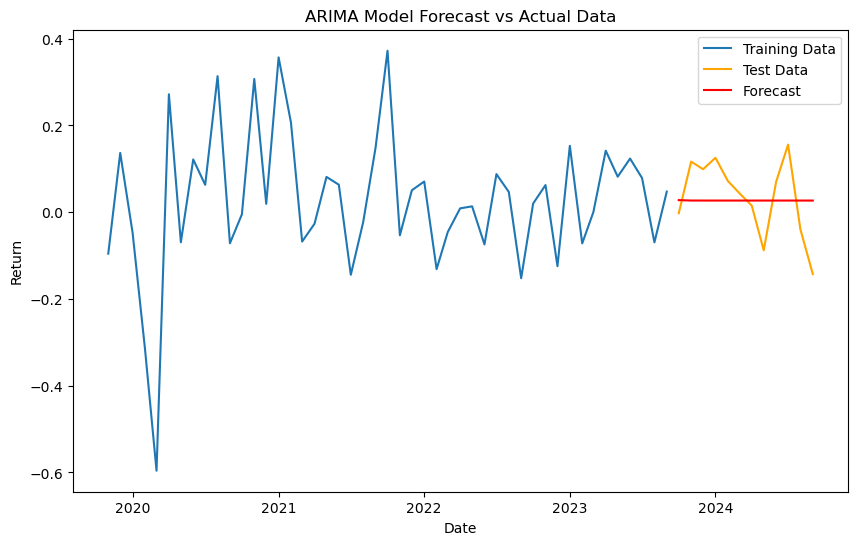

Model Evaluation Metrics for ARIMA:

Mean Absolute Error (MAE): 0.07399025741682477
Root Mean Squared Error (RMSE): 0.0871962372461581


In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the sample data
data = stock_data_month['return']

# Split the data into training and test sets
train_size = int(len(data) * 0.8)  # Use 80% of data for training
train, test = data[:train_size], data[train_size:]

# Define the order of the ARIMA model
order = (1, 1, 1)

# Create an ARIMA model object
model = ARIMA(train, order=order)

# Fit the model to the training data
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

# Forecast the next data points equal to the length of the test set
forecast = fitted_model.forecast(steps=len(test))

# Generate forecast dates based on the test set index
forecast_dates = test.index

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print the evaluation metrics
print('Model Evaluation Metrics for ARIMA:\n')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

<Figure size 1000x500 with 0 Axes>

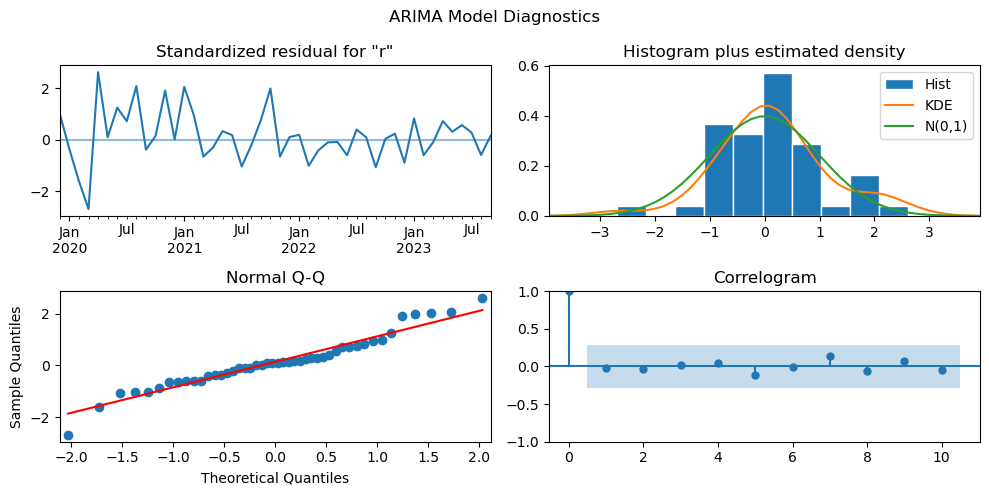

In [8]:
# Plot diagnostic graphs
fig = plt.figure(figsize=(10, 5))
fitted_model.plot_diagnostics(figsize=(10, 5))
plt.suptitle('ARIMA Model Diagnostics')
plt.tight_layout()
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.4200
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3703
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2994
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2417
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1813
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1272
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0725
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0436
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0277
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0373
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0516
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0509
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0399
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0311
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0240
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

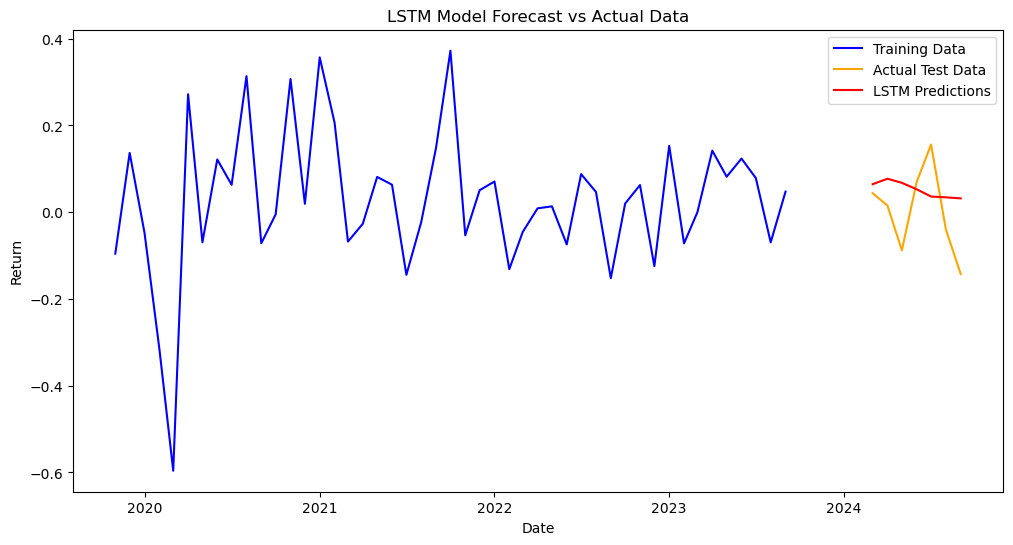

Model Evaluation Metrics for LSTM:

LSTM Mean Squared Error (MSE): 0.011300730897310221
LSTM Root Mean Squared Error (RMSE): 0.10630489592351906


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_returns = scaler.fit_transform(data.values.reshape(-1, 1))

# Create training and testing datasets
train_size = int(len(scaled_returns) * 0.8)
train_data = scaled_returns[:train_size]
test_data = scaled_returns[train_size:]

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape the data into a format suitable for LSTM
time_step = 5  # Number of previous time steps to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a simple LSTM model
model = keras.Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[:train_size], scaler.inverse_transform(train_data), label='Training Data', color='blue')
plt.plot(data.index[train_size + time_step:], scaler.inverse_transform(test_data[time_step:]), label='Actual Test Data', color='orange')
plt.plot(data.index[train_size + time_step:], test_predict, label='LSTM Predictions', color='red')
plt.title('LSTM Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE) and RMSE for LSTM
mse_lstm = mean_squared_error(scaler.inverse_transform(test_data[time_step:]), test_predict)
rmse_lstm = np.sqrt(mse_lstm)

print('Model Evaluation Metrics for LSTM:\n')
print(f'LSTM Mean Squared Error (MSE): {mse_lstm}')
print(f'LSTM Root Mean Squared Error (RMSE): {rmse_lstm}')

## Monte carlo simulations on Monthly Data to predict next 12 Months

In [11]:
# Calculate mean and standard deviation of returns
mean_return = stock_data_month['return'].mean()
std_dev = stock_data_month['return'].std()

stock_data_month.index = pd.to_datetime(stock_data_month.index) #change to datetime format
# Simulation parameters
num_simulations = 1000  # Number of simulated paths
num_days = 365           # Number of days to simulate

# Create an empty DataFrame to store the results
simulated_paths = pd.DataFrame()

# Monte Carlo simulation
for i in range(num_simulations):
    # Generate random daily returns based on normal distribution
    random_returns = np.random.normal(mean_return, std_dev, num_days)
    
    # Create a cumulative return series starting from the last known return
    last_return = stock_data_month['return'].iloc[-1]
    cumulative_returns = np.exp(np.cumsum(random_returns)) * last_return
    
    # Create a date range for the future dates
    future_dates = pd.date_range(start=stock_data_month.index[-1] + pd.Timedelta(days=1), periods=num_days)
    
    # Store the simulated path in the DataFrame
    simulated_paths[i] = cumulative_returns

# Set the index of the simulated paths DataFrame to future dates
simulated_paths.index = future_dates

C:\Users\anike\AppData\Local\Temp\ipykernel_27340\2099825762.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_paths[i] = cumulative_returns
C:\Users\anike\AppData\Local\Temp\ipykernel_27340\2099825762.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_paths[i] = cumulative_returns
C:\Users\anike\AppData\Local\Temp\ipykernel_27340\2099825762.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

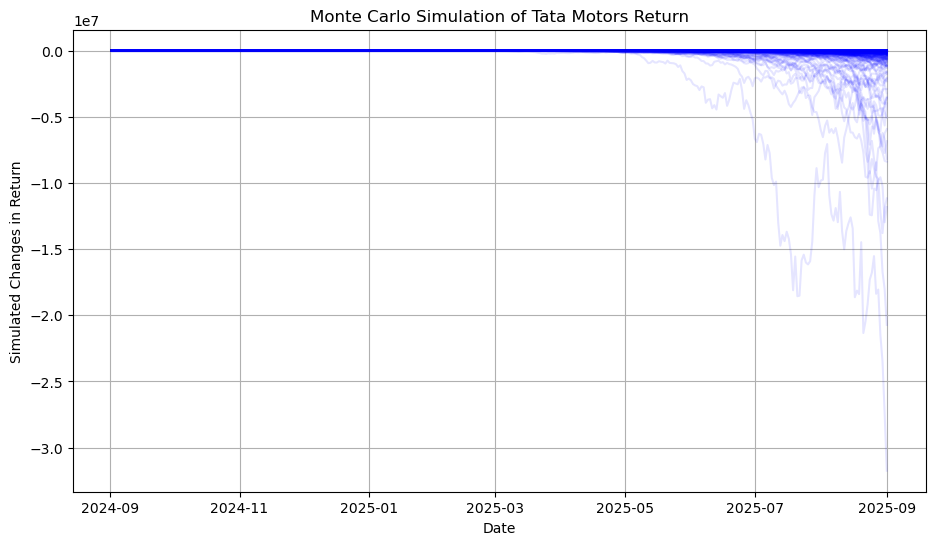

In [12]:
# Step 6: Plotting the results
plt.figure(figsize=(11, 6))
plt.plot(simulated_paths, color='blue', alpha=0.1)  # Plot all simulations with some transparency
plt.title('Monte Carlo Simulation of Tata Motors Return')
plt.xlabel('Date')
plt.ylabel('Simulated Changes in Return')
plt.grid()
plt.show()